In [59]:
from vivarium import InteractiveContext, Artifact

from datetime import datetime, timedelta
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd, numpy as np
pd.set_option('display.max_rows', 60)

import numpy as np
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf

### LDL-Validation
- Need to confirm branch prior to working 
- Run on 8/25/22, pulled today 
- Working on validation and verification of LDL-C 

## Load in Data and First Time Step

In [2]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
path

PosixPath('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')

In [3]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({
                          'population':
                              {'population_size': 10_000,
                              },
                          'time':
                              {'start':
                                  {'year': 2025
                                  }
                              }
                          }
                        )
sim.setup()


2022-09-06 07:49:07.977 | DEBUG    | vivarium.framework.values:register_value_modifier:392 - Registering metrics.1.population_manager.metrics as modifier to metrics
2022-09-06 07:49:08.095 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2022-09-06 07:49:08.096 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact base filter terms are ['draw == 0'].
2022-09-06 07:49:08.097 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:68 - Artifact additional filter terms are None.
2022-09-06 07:49:08.536 | DEBUG    | vivarium.framework.values:_register_value_producer:338 - Registering value pipeline cause_specific_mortality_rate
2022-09-06 07:49:08.541 | DEBUG    | vivarium.framework.values:_register_value_producer:338 - Registering value pipeline mortality_rate
2022-09-06 07:49:08.995 | DEBUG    | vivarium.framework.values:_regis

In [4]:
pop0 = sim.get_population()
pop0.head()

,tracked,sex,age,location,alive,exit_time,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,acute_ischemic_stroke_event_count,acute_ischemic_stroke_event_time,chronic_ischemic_stroke_event_time,chronic_ischemic_stroke_event_count,susceptible_to_myocardial_infarction_event_count,susceptible_to_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time
0,True,Male,46.455889,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,0,NaT,NaT,0,0,NaT,0,NaT,0,NaT
1,True,Female,57.659145,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,0,NaT,NaT,0,0,NaT,0,NaT,0,NaT
2,True,Male,18.288245,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,0,NaT,NaT,0,0,NaT,0,NaT,0,NaT
3,True,Female,23.017699,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,0,NaT,NaT,0,0,NaT,0,NaT,0,NaT
4,True,Male,16.985247,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,0,NaT,NaT,0,0,NaT,0,NaT,0,NaT


In [11]:
pop0.previous_myocardial_infarction.unique()

array([''], dtype=object)

In [15]:
pop0.loc[pop0['susceptible_to_myocardial_infarction_event_time'].notnull()]

,tracked,sex,age,location,alive,exit_time,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,acute_ischemic_stroke_event_count,acute_ischemic_stroke_event_time,chronic_ischemic_stroke_event_time,chronic_ischemic_stroke_event_count,susceptible_to_myocardial_infarction_event_count,susceptible_to_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time


In [5]:
pop0.columns

Index(['tracked', 'sex', 'age', 'location', 'alive', 'exit_time',
       'entrance_time', 'years_of_life_lost', 'cause_of_death',
       'years_lived_with_disability', 'previous_ischemic_stroke',
       'previous_myocardial_infarction', 'previous_angina', 'angina',
       'ischemic_stroke', 'myocardial_infarction',
       'high_ldl_cholesterol_propensity',
       'ensemble_propensity_risk_factor.high_ldl_cholesterol',
       'high_systolic_blood_pressure_propensity',
       'ensemble_propensity_risk_factor.high_systolic_blood_pressure',
       'susceptible_to_angina_event_time', 'susceptible_to_angina_event_count',
       'angina_event_count', 'angina_event_time',
       'susceptible_to_ischemic_stroke_event_time',
       'susceptible_to_ischemic_stroke_event_count',
       'acute_ischemic_stroke_event_count', 'acute_ischemic_stroke_event_time',
       'chronic_ischemic_stroke_event_time',
       'chronic_ischemic_stroke_event_count',
       'susceptible_to_myocardial_infarction_event_

In [6]:
sim.list_values()

['metrics',
 'cause_specific_mortality_rate',
 'mortality_rate',
 'affected_unmodeled.cause_specific_mortality_rate',
 'affected_unmodeled.cause_specific_mortality_rate.paf',
 'disability_weight',
 'angina.incidence_rate',
 'angina.incidence_rate.paf',
 'angina.dwell_time',
 'angina.disability_weight',
 'angina.excess_mortality_rate',
 'angina.excess_mortality_rate.paf',
 'high_ldl_cholesterol.exposure',
 'acute_myocardial_infarction.incidence_rate',
 'acute_myocardial_infarction.incidence_rate.paf',
 'post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate',
 'post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.paf',
 'acute_ischemic_stroke.incidence_rate',
 'acute_ischemic_stroke.incidence_rate.paf',
 'chronic_ischemic_stroke_to_acute_ischemic_stroke.transition_rate',
 'chronic_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.paf',
 'high_systolic_blood_pressure.exposure',
 'acute_ischemic_stroke.dwell_time',
 'acute_ischemic_stroke.dis

In [120]:
data1 = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl_cholesterol'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   sim.get_value('acute_myocardial_infarction.incidence_rate')(pop0.index).rename('acute_mi'),
                   sim.get_value('acute_ischemic_stroke.incidence_rate')(pop0.index).rename('acute_stroke'),                   
                   sim.get_value('angina.incidence_rate')(pop0.index).rename('angina_inc'),                   
                  ], axis=1)
data1.head()

,tracked,sex,age,location,alive,exit_time,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,susceptible_to_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time,high_ldl_cholesterol,high_sbp,acute_mi,acute_stroke,angina_inc
0,True,Male,46.455889,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,2.036127,111.921899,0.000139,0.000036,0.000010
1,True,Female,57.659145,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,3.506086,130.091762,0.000370,0.000189,0.000051
2,True,Male,18.288245,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,3.613170,112.089491,0.000023,0.000004,0.000005
3,True,Female,23.017699,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,3.271317,116.089078,0.000026,0.000009,0.000005
4,True,Male,16.985247,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,2.394570,113.482139,0.000010,0.000003,0.000002


In [115]:
data1.loc[data1['high_sbp']>200]

,tracked,sex,age,location,alive,exit_time,entrance_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,susceptible_to_myocardial_infarction_event_time,acute_myocardial_infarction_event_count,acute_myocardial_infarction_event_time,post_myocardial_infarction_event_count,post_myocardial_infarction_event_time,high_ldl_cholesterol,high_sbp,acute_mi,acute_stroke,angina
1100,True,Female,71.548917,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,2.826163,210.154427,0.002660,0.001632,0.000289
2874,True,Female,29.301026,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,1.213286,300.000000,0.000000,0.000000,0.000000
6352,True,Female,86.243969,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,2.083896,221.219060,0.000000,0.000000,0.000000
6609,True,Female,41.998555,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,3.782890,300.000000,0.111134,0.083768,0.022398
9953,True,Female,69.278848,Alabama,alive,NaT,2024-12-04,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,3.209586,202.261075,0.003574,0.002333,0.000380


## Standard Deviation Testing
### For LDL-C First

#### Load in the Artifact

In [62]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [63]:
def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

In [64]:
ldl_exp_std = load_artifact_data('risk_factor', 'high_ldl_cholesterol', 'exposure_standard_deviation')
ldl_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(ldl_exp_std.age_start,ldl_exp_std.age_end)]
ldl_exp_std.head()

/tmp/ipykernel_1938380/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.770720,0.739939,0.802223,Alabama,exposure_standard_deviation,25_to_29
1,female,30.0,35.0,2019,2020,0.760812,0.726483,0.795325,Alabama,exposure_standard_deviation,30_to_34
2,female,35.0,40.0,2019,2020,0.796737,0.761689,0.828880,Alabama,exposure_standard_deviation,35_to_39
3,female,40.0,45.0,2019,2020,0.795283,0.761479,0.829430,Alabama,exposure_standard_deviation,40_to_44
4,female,45.0,50.0,2019,2020,0.841080,0.813876,0.871734,Alabama,exposure_standard_deviation,45_to_49


In [65]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data1_std = (data1
                .groupby(['age_start', 'sex'])
                .high_ldl_cholesterol.describe()
                .filter(['std'])
                .reset_index())
data1_std = data1_std.loc[data1_std['age_start'] > 20]
data1_std.head()

,age_start,sex,std
8,25.0,Female,0.858615
9,25.0,Male,0.799856
10,30.0,Female,0.818439
11,30.0,Male,0.839310
12,35.0,Female,0.876117


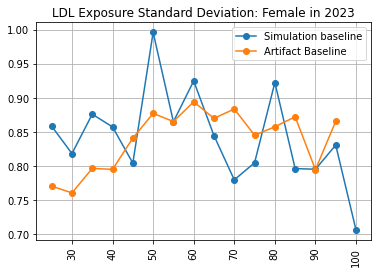

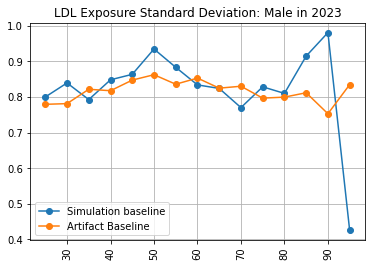

In [66]:
for sex in data1_std.sex.unique():
    plt.figure() 
    subdata = data1_std.loc[(data1_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = ldl_exp_std.loc[(ldl_exp_std.sex==sex.lower()) & (ldl_exp_std.year_end==2020)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'LDL Exposure Standard Deviation: {sex} in 2023') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline', 'Artifact 95%']) 

The standard deviation looks pretty good here! 

### Now for SBP

In [67]:
sbp_exp_std = load_artifact_data('risk_factor', 'high_systolic_blood_pressure', 'exposure_standard_deviation')
sbp_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(sbp_exp_std.age_start,sbp_exp_std.age_end)]
sbp_exp_std.head()

/tmp/ipykernel_1938380/881126595.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_art_data = master_art_data.append(data)


,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,8.022403,7.906046,8.148412,Alabama,exposure_standard_deviation,25_to_29
1,female,30.0,35.0,2019,2020,9.180372,9.047262,9.325224,Alabama,exposure_standard_deviation,30_to_34
2,female,35.0,40.0,2019,2020,10.330872,10.176664,10.481475,Alabama,exposure_standard_deviation,35_to_39
3,female,40.0,45.0,2019,2020,11.285085,11.106778,11.458061,Alabama,exposure_standard_deviation,40_to_44
4,female,45.0,50.0,2019,2020,13.460227,13.277262,13.656248,Alabama,exposure_standard_deviation,45_to_49


In [121]:
data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)
data1_std = (data1
                .groupby(['age_start', 'sex'])
                .high_sbp.describe()
                .filter(['std'])
                .reset_index())
data1_std = data1_std.loc[data1_std['age_start'] > 20]
data1_std.head()

,age_start,sex,std
8,25.0,Female,14.837208
9,25.0,Male,12.017951
10,30.0,Female,11.496435
11,30.0,Male,11.844082
12,35.0,Female,13.386991


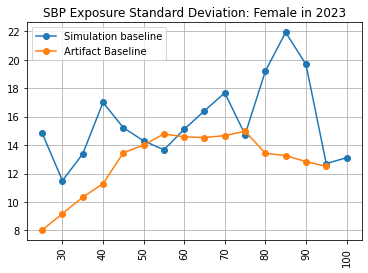

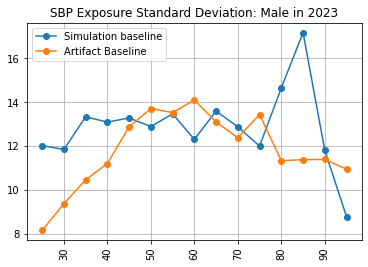

In [69]:
for sex in data1_std.sex.unique():
    plt.figure() 
    subdata = data1_std.loc[(data1_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = sbp_exp_std.loc[(sbp_exp_std.sex==sex.lower()) & (sbp_exp_std.year_end==2020)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    #plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'SBP Exposure Standard Deviation: {sex} in 2023') 
    plt.xticks(rotation=90) 
    #plt.ylim(0,100000)
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline', 'Artifact 95%']) 

A little funky at the start but I would guess this is due to very small numbers at the youngest age groups. Overall this looks fine.

## Relative Risk and PAF Testing 
### First for Myocardial Infarction
Trying the Ali approach first

In [70]:
def load_artifact_key(word:str, cause:str, measure:str):
    data = pd.DataFrame()
    for i in ['alabama']:
        
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25', 'draw==0']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        data = art.load(word + '.' + cause + '.' + measure)
    return data

In [71]:
data_MI = data1[['age_start','sex','high_ldl_cholesterol','high_sbp','acute_myocardial_infarction_event_count']]
data_MI['acute_MI_binary'] = np.where(data_MI['acute_myocardial_infarction_event_count'] == 0, 0, 1)
data_MI = data_MI.loc[data_MI['age_start'] > 20]
data_MI.head()

/tmp/ipykernel_1938380/1761707840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_MI['acute_MI_binary'] = np.where(data_MI['acute_myocardial_infarction_event_count'] == 0, 0, 1)


,age_start,sex,high_ldl_cholesterol,high_sbp,acute_myocardial_infarction_event_count,acute_MI_binary
0,45.0,Male,2.036127,111.921899,0,0
1,55.0,Female,3.506086,130.091762,0,0
5,70.0,Female,2.944739,152.034843,0,0
6,50.0,Female,2.649120,135.424982,0,0
7,60.0,Male,2.611377,152.541443,0,0


In [72]:
art_MI_inc = load_artifact_key('cause', 'myocardial_infarction', 'incidence_rate')
art_MI_inc = art_MI_inc.rename(columns={"draw_0": "inc"}).reset_index()
art_MI_inc.head()

,sex,age_start,age_end,year_start,year_end,inc
0,Female,25.0,30.0,2019,2020,0.000403
1,Female,30.0,35.0,2019,2020,0.000430
2,Female,35.0,40.0,2019,2020,0.000355
3,Female,40.0,45.0,2019,2020,0.000450
4,Female,45.0,50.0,2019,2020,0.000717


'risk_factor.high_ldl_cholesterol.relative_risk'

'risk_factor.high_ldl_cholesterol.population_attributable_fraction'

In [73]:
art_MI_rr_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'relative_risk')
art_MI_rr_ldl = art_MI_rr_ldl.rename(columns={"draw_0": "rr_ldl"}).reset_index()
art_MI_rr_ldl = art_MI_rr_ldl.loc[art_MI_rr_ldl['affected_entity'] == 'acute_myocardial_infarction']
art_MI_rr_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_ldl
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0053
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0267
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0483
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.9898
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.8515


In [74]:
art_MI_rr_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'relative_risk')
art_MI_rr_sbp = art_MI_rr_sbp.rename(columns={"draw_0": "rr_sbp"}).reset_index()
art_MI_rr_sbp = art_MI_rr_sbp.loc[art_MI_rr_sbp['affected_entity'] == 'acute_myocardial_infarction']
art_MI_rr_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_sbp
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,2.0317
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.8558
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.6799
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.5729
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,per unit,1.5348


In [75]:
art_MI_paf_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'population_attributable_fraction')
art_MI_paf_ldl = art_MI_paf_ldl.rename(columns={"draw_0": "paf_ldl"}).reset_index()
art_MI_paf_ldl = art_MI_paf_ldl.loc[art_MI_paf_ldl['affected_entity'] == 'acute_myocardial_infarction']
art_MI_paf_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_ldl
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.810800
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.813019
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.812301
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.812845
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.777130


In [76]:
art_MI_paf_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'population_attributable_fraction')
art_MI_paf_sbp = art_MI_paf_sbp.rename(columns={"draw_0": "paf_sbp"}).reset_index()
art_MI_paf_sbp = art_MI_paf_sbp.loc[art_MI_paf_sbp['affected_entity'] == 'acute_myocardial_infarction']
art_MI_paf_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_sbp
0,Female,25.0,30.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.276953
1,Female,30.0,35.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.330705
2,Female,35.0,40.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.290626
3,Female,40.0,45.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.431115
4,Female,45.0,50.0,2019,2020,acute_myocardial_infarction,incidence_rate,0.507418


In [77]:
from get_draws.api import get_draws
rrs_sbp = get_draws(gbd_id_type='rei_id',
               gbd_id=107,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_sbp = rrs_sbp.loc[rrs_sbp.cause_id==493]
rrs_sbp = rrs_sbp[['age_group_id','sex_id','draw_0']]
rrs_sbp['age_start'] = np.where(rrs_sbp['age_group_id']==10,25,np.where(rrs_sbp['age_group_id']==11,30,np.where(rrs_sbp['age_group_id']==12,35,np.where(rrs_sbp['age_group_id']==13,40,np.where(rrs_sbp['age_group_id']==14,45,np.where(rrs_sbp['age_group_id']==15,50,np.where(rrs_sbp['age_group_id']==16,55,np.where(rrs_sbp['age_group_id']==17,60,np.where(rrs_sbp['age_group_id']==18,65,np.where(rrs_sbp['age_group_id']==19,70,np.where(rrs_sbp['age_group_id']==20,75,np.where(rrs_sbp['age_group_id']==30,80,np.where(rrs_sbp['age_group_id']==31,85,np.where(rrs_sbp['age_group_id']==32,90,0))))))))))))))
rrs_sbp['sex'] = np.where(rrs_sbp['sex_id']==1,'Male','Female')
rrs_sbp = rrs_sbp.rename(columns={"draw_0": "rr_gbd_sbp"}).reset_index()
rrs_sbp.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_sbp,age_start,sex
0,55,10,1,2.0317,25,Male
1,56,11,1,1.8558,30,Male
2,57,12,1,1.6799,35,Male
3,58,13,1,1.5729,40,Male
4,59,14,1,1.5348,45,Male


In [78]:
rrs = get_draws(gbd_id_type='rei_id',
               gbd_id=367,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs = rrs.loc[rrs.cause_id==493]
rrs = rrs[['age_group_id','sex_id','draw_0']]
rrs['age_start'] = np.where(rrs['age_group_id']==10,25,np.where(rrs['age_group_id']==11,30,np.where(rrs['age_group_id']==12,35,np.where(rrs['age_group_id']==13,40,np.where(rrs['age_group_id']==14,45,np.where(rrs['age_group_id']==15,50,np.where(rrs['age_group_id']==16,55,np.where(rrs['age_group_id']==17,60,np.where(rrs['age_group_id']==18,65,np.where(rrs['age_group_id']==19,70,np.where(rrs['age_group_id']==20,75,np.where(rrs['age_group_id']==30,80,np.where(rrs['age_group_id']==31,85,np.where(rrs['age_group_id']==32,90,0))))))))))))))
rrs['sex'] = np.where(rrs['sex_id']==1,'Male','Female')
rrs = rrs.rename(columns={"draw_0": "rr_gbd_ldl"}).reset_index()
rrs.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_ldl,age_start,sex
0,0,10,1,2.0053,25,Male
1,1,11,1,2.0267,30,Male
2,2,12,1,2.0483,35,Male
3,3,13,1,1.9898,40,Male
4,4,14,1,1.8515,45,Male


In [79]:
tmrel_ldl = 1
tmrel_sbp = 112.5

data_merged = (data_MI.merge(art_MI_inc[['age_start','sex','inc']], on=['age_start','sex'])
               .merge(art_MI_paf_ldl[['age_start','sex','paf_ldl']], on=['age_start','sex'])
               .merge(art_MI_paf_sbp[['age_start','sex','paf_sbp']], on=['age_start','sex'])
              .merge(art_MI_rr_ldl[['age_start','sex','rr_ldl']], on=['age_start','sex'])
              .merge(art_MI_rr_sbp[['age_start','sex','rr_sbp']], on=['age_start','sex'])
              .merge(rrs[['age_start','sex','rr_gbd_ldl']], on=['age_start','sex'])
              .merge(rrs_sbp[['age_start','sex','rr_gbd_sbp']], on=['age_start','sex']))
data_merged['exposure_i_ldl'] = np.where(data_merged.high_ldl_cholesterol < 1, 0, (data_merged.high_ldl_cholesterol - tmrel_ldl))
data_merged['exposure_i_sbp'] = np.where(data_merged.high_sbp < 112.5, 0, (data_merged.high_sbp - tmrel_sbp)/10)
data_merged['rr_i_ldl'] = np.exp(np.log(data_merged.rr_gbd_ldl) * data_merged.exposure_i_ldl)
data_merged['rr_i_sbp'] = np.exp(np.log(data_merged.rr_gbd_sbp) * data_merged.exposure_i_sbp)
data_merged['inc_i_ldl'] = data_merged.inc * (1 - data_merged.paf_ldl) * data_merged.rr_i_ldl
data_merged['inc_i_sbp'] = data_merged.inc * (1 - data_merged.paf_sbp) * data_merged.rr_i_sbp
data_merged.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,acute_myocardial_infarction_event_count,acute_MI_binary,inc,paf_ldl,paf_sbp,rr_ldl,rr_sbp,rr_gbd_ldl,rr_gbd_sbp,exposure_i_ldl,exposure_i_sbp,rr_i_ldl,rr_i_sbp,inc_i_ldl,inc_i_sbp
0,45.0,Male,2.036127,111.921899,0,0,0.00188,0.806493,0.470086,1.8515,1.5348,1.8515,1.5348,1.036127,0.000000,1.893166,1.000000,0.000689,0.000996
1,45.0,Male,2.831955,101.070491,0,0,0.00188,0.806493,0.470086,1.8515,1.5348,1.8515,1.5348,1.831955,0.000000,3.090945,1.000000,0.001125,0.000996
2,45.0,Male,3.392318,170.579507,0,0,0.00188,0.806493,0.470086,1.8515,1.5348,1.8515,1.5348,2.392318,5.807951,4.365176,12.038705,0.001588,0.011995
3,45.0,Male,2.352156,115.245807,0,0,0.00188,0.806493,0.470086,1.8515,1.5348,1.8515,1.5348,1.352156,0.274581,2.300032,1.124828,0.000837,0.001121
4,45.0,Male,2.301499,131.370571,0,0,0.00188,0.806493,0.470086,1.8515,1.5348,1.8515,1.5348,1.301499,1.887057,2.229369,2.244349,0.000811,0.002236


In [80]:
data_merged = data_merged.loc[data_merged['inc_i_sbp']<1]
p = data_merged.groupby(['age_start','inc']).mean()[['inc_i_ldl','inc_i_sbp']].reset_index()

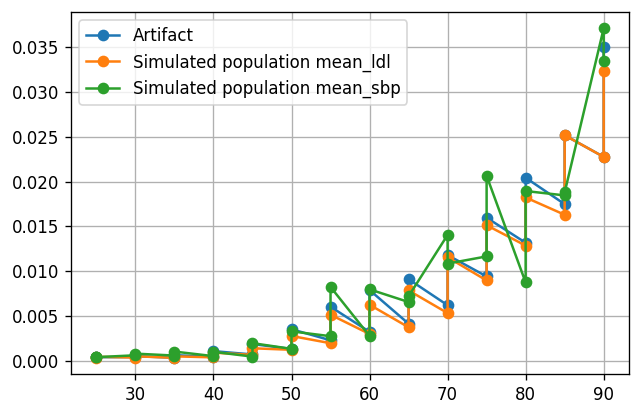

In [81]:
plt.figure(dpi=120)
plt.plot(p.age_start, p.inc, marker='o', label='Artifact')
plt.plot(p.age_start, p.inc_i_ldl, marker='o', label='Simulated population mean_ldl')
plt.plot(p.age_start, p.inc_i_sbp, marker='o', label='Simulated population mean_sbp')
plt.legend()
plt.grid()

## Same approach for stroke - both LDL and SBP

In [82]:
data_stroke = data1[['age_start','sex','high_ldl_cholesterol','high_sbp','acute_ischemic_stroke_event_count']]
data_stroke = data_stroke.loc[data_stroke['age_start'] > 20]
data_stroke.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,acute_ischemic_stroke_event_count
0,45.0,Male,2.036127,111.921899,0
1,55.0,Female,3.506086,130.091762,0
5,70.0,Female,2.944739,152.034843,0
6,50.0,Female,2.649120,135.424982,0
7,60.0,Male,2.611377,152.541443,0


In [83]:
art_stroke_inc = load_artifact_key('cause', 'ischemic_stroke', 'incidence_rate')
art_stroke_inc = art_stroke_inc.rename(columns={"draw_0": "inc"}).reset_index()
art_stroke_inc.head()

,sex,age_start,age_end,year_start,year_end,inc
0,Female,25.0,30.0,2019,2020,0.000088
1,Female,30.0,35.0,2019,2020,0.000131
2,Female,35.0,40.0,2019,2020,0.000199
3,Female,40.0,45.0,2019,2020,0.000389
4,Female,45.0,50.0,2019,2020,0.000703


In [84]:
art_stroke_rr_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'relative_risk')
art_stroke_rr_ldl = art_stroke_rr_ldl.rename(columns={"draw_0": "rr_ldl"}).reset_index()
art_stroke_rr_ldl = art_stroke_rr_ldl.loc[art_stroke_rr_ldl['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_rr_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_ldl
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.4165
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.4715
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5265
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5155
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.4385


In [85]:
art_stroke_rr_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'relative_risk')
art_stroke_rr_sbp = art_stroke_rr_sbp.rename(columns={"draw_0": "rr_sbp"}).reset_index()
art_stroke_rr_sbp = art_stroke_rr_sbp.loc[art_stroke_rr_sbp['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_rr_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr_sbp
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.7644
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.7026
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.6409
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5878
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,per unit,1.5435


In [86]:
art_stroke_paf_ldl = load_artifact_key('risk_factor', 'high_ldl_cholesterol', 'population_attributable_fraction')
art_stroke_paf_ldl = art_stroke_paf_ldl.rename(columns={"draw_0": "paf_ldl"}).reset_index()
art_stroke_paf_ldl = art_stroke_paf_ldl.loc[art_stroke_paf_ldl['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_paf_ldl.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_ldl
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.547415
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.583508
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.608706
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.622023
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.573479


In [87]:
art_stroke_paf_sbp = load_artifact_key('risk_factor', 'high_systolic_blood_pressure', 'population_attributable_fraction')
art_stroke_paf_sbp = art_stroke_paf_sbp.rename(columns={"draw_0": "paf_sbp"}).reset_index()
art_stroke_paf_sbp = art_stroke_paf_sbp.loc[art_stroke_paf_sbp['affected_entity'] == 'acute_ischemic_stroke']
art_stroke_paf_sbp.head()

,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf_sbp
90,Female,25.0,30.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.216149
91,Female,30.0,35.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.281803
92,Female,35.0,40.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.276264
93,Female,40.0,45.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.439278
94,Female,45.0,50.0,2019,2020,acute_ischemic_stroke,incidence_rate,0.513140


In [88]:
rrs_sbp = get_draws(gbd_id_type='rei_id',
               gbd_id=107,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs_sbp = rrs_sbp.loc[rrs_sbp.cause_id==495]
rrs_sbp = rrs_sbp[['age_group_id','sex_id','draw_0']]
rrs_sbp['age_start'] = np.where(rrs_sbp['age_group_id']==10,25,np.where(rrs_sbp['age_group_id']==11,30,np.where(rrs_sbp['age_group_id']==12,35,np.where(rrs_sbp['age_group_id']==13,40,np.where(rrs_sbp['age_group_id']==14,45,np.where(rrs_sbp['age_group_id']==15,50,np.where(rrs_sbp['age_group_id']==16,55,np.where(rrs_sbp['age_group_id']==17,60,np.where(rrs_sbp['age_group_id']==18,65,np.where(rrs_sbp['age_group_id']==19,70,np.where(rrs_sbp['age_group_id']==20,75,np.where(rrs_sbp['age_group_id']==30,80,np.where(rrs_sbp['age_group_id']==31,85,np.where(rrs_sbp['age_group_id']==32,90,0))))))))))))))
rrs_sbp['sex'] = np.where(rrs_sbp['sex_id']==1,'Male','Female')
rrs_sbp = rrs_sbp.rename(columns={"draw_0": "rr_gbd_sbp"}).reset_index()
rrs_sbp.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_sbp,age_start,sex
0,110,10,1,1.7644,25,Male
1,111,11,1,1.7026,30,Male
2,112,12,1,1.6409,35,Male
3,113,13,1,1.5878,40,Male
4,114,14,1,1.5435,45,Male


In [89]:
rrs = get_draws(gbd_id_type='rei_id',
               gbd_id=367,
               gbd_round_id=6,
               year_id=2019,
               age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
               sex_id=[1,2],
               source='rr',
               decomp_step='step4',
               status='best'
               )
rrs = rrs.loc[rrs.cause_id==495]
rrs = rrs[['age_group_id','sex_id','draw_0']]
rrs['age_start'] = np.where(rrs['age_group_id']==10,25,np.where(rrs['age_group_id']==11,30,np.where(rrs['age_group_id']==12,35,np.where(rrs['age_group_id']==13,40,np.where(rrs['age_group_id']==14,45,np.where(rrs['age_group_id']==15,50,np.where(rrs['age_group_id']==16,55,np.where(rrs['age_group_id']==17,60,np.where(rrs['age_group_id']==18,65,np.where(rrs['age_group_id']==19,70,np.where(rrs['age_group_id']==20,75,np.where(rrs['age_group_id']==30,80,np.where(rrs['age_group_id']==31,85,np.where(rrs['age_group_id']==32,90,0))))))))))))))
rrs['sex'] = np.where(rrs['sex_id']==1,'Male','Female')
rrs = rrs.rename(columns={"draw_0": "rr_gbd_ldl"}).reset_index()
rrs.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,index,age_group_id,sex_id,rr_gbd_ldl,age_start,sex
0,11,10,1,1.4165,25,Male
1,12,11,1,1.4715,30,Male
2,13,12,1,1.5265,35,Male
3,14,13,1,1.5155,40,Male
4,15,14,1,1.4385,45,Male


In [90]:
tmrel_ldl = 1
tmrel_sbp = 112.5

data_merged = (data_stroke.merge(art_stroke_inc[['age_start','sex','inc']], on=['age_start','sex'])
               .merge(art_stroke_paf_ldl[['age_start','sex','paf_ldl']], on=['age_start','sex'])
               .merge(art_stroke_paf_sbp[['age_start','sex','paf_sbp']], on=['age_start','sex'])
              .merge(art_stroke_rr_ldl[['age_start','sex','rr_ldl']], on=['age_start','sex'])
              .merge(art_stroke_rr_sbp[['age_start','sex','rr_sbp']], on=['age_start','sex'])
              .merge(rrs[['age_start','sex','rr_gbd_ldl']], on=['age_start','sex'])
              .merge(rrs_sbp[['age_start','sex','rr_gbd_sbp']], on=['age_start','sex']))
data_merged['exposure_i_ldl'] = np.where(data_merged.high_ldl_cholesterol < 1, 0, (data_merged.high_ldl_cholesterol - tmrel_ldl))
data_merged['exposure_i_sbp'] = np.where(data_merged.high_sbp < 112.5, 0, (data_merged.high_sbp - tmrel_sbp)/10)
data_merged['rr_i_ldl'] = np.exp(np.log(data_merged.rr_gbd_ldl) * data_merged.exposure_i_ldl)
data_merged['rr_i_sbp'] = np.exp(np.log(data_merged.rr_gbd_sbp) * data_merged.exposure_i_sbp)
data_merged['inc_i_ldl'] = data_merged.inc * (1 - data_merged.paf_ldl) * data_merged.rr_i_ldl
data_merged['inc_i_sbp'] = data_merged.inc * (1 - data_merged.paf_sbp) * data_merged.rr_i_sbp
data_merged.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,acute_ischemic_stroke_event_count,inc,paf_ldl,paf_sbp,rr_ldl,rr_sbp,rr_gbd_ldl,rr_gbd_sbp,exposure_i_ldl,exposure_i_sbp,rr_i_ldl,rr_i_sbp,inc_i_ldl,inc_i_sbp
0,45.0,Male,2.036127,111.921899,0,0.000577,0.607366,0.475584,1.4385,1.5435,1.4385,1.5435,1.036127,0.000000,1.457521,1.000000,0.000330,0.000302
1,45.0,Male,2.831955,101.070491,0,0.000577,0.607366,0.475584,1.4385,1.5435,1.4385,1.5435,1.831955,0.000000,1.946631,1.000000,0.000441,0.000302
2,45.0,Male,3.392318,170.579507,0,0.000577,0.607366,0.475584,1.4385,1.5435,1.4385,1.5435,2.392318,5.807951,2.386550,12.440478,0.000540,0.003762
3,45.0,Male,2.352156,115.245807,0,0.000577,0.607366,0.475584,1.4385,1.5435,1.4385,1.5435,1.352156,0.274581,1.635004,1.126575,0.000370,0.000341
4,45.0,Male,2.301499,131.370571,0,0.000577,0.607366,0.475584,1.4385,1.5435,1.4385,1.5435,1.301499,1.887057,1.605164,2.268416,0.000363,0.000686


In [91]:
data_merged = data_merged.loc[data_merged['inc_i_sbp']<1]
p = data_merged.groupby(['age_start','inc']).mean()[['inc_i_ldl','inc_i_sbp']].reset_index()

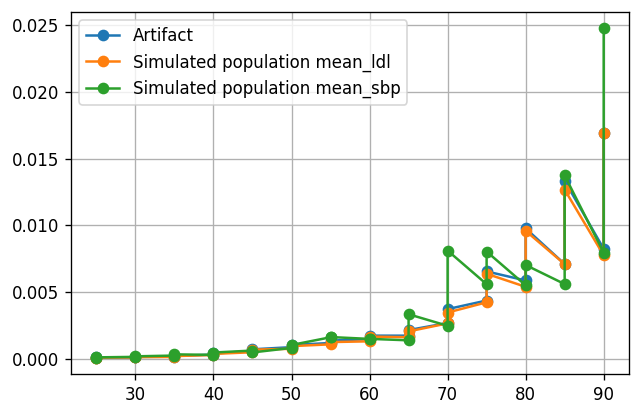

In [92]:
plt.figure(dpi=120)
plt.plot(p.age_start, p.inc, marker='o', label='Artifact')
plt.plot(p.age_start, p.inc_i_ldl, marker='o', label='Simulated population mean_ldl')
plt.plot(p.age_start, p.inc_i_sbp, marker='o', label='Simulated population mean_sbp')
plt.legend()
plt.grid()

## Regression Model Using Incidence Values, not Many Time Steps

#### First for MI and LDL

In [123]:
data_MI_regression = data1[['age_start','sex','high_ldl_cholesterol','high_sbp','acute_mi','acute_stroke','angina_inc']]
data_MI_regression['sbp_exposure'] = np.where(data_MI_regression.high_sbp < 112.5, 0, (data_MI_regression.high_sbp - 112.5)/10)
data_MI_regression.head()

,age_start,sex,high_ldl_cholesterol,high_sbp,acute_mi,acute_stroke,angina_inc,sbp_exposure
0,45.0,Male,2.036127,111.921899,0.000139,0.000036,0.000010,0.000000
1,55.0,Female,3.506086,130.091762,0.000370,0.000189,0.000051,1.759176
2,15.0,Male,3.613170,112.089491,0.000023,0.000004,0.000005,0.000000
3,20.0,Female,3.271317,116.089078,0.000026,0.000009,0.000005,0.358908
4,15.0,Male,2.394570,113.482139,0.000010,0.000003,0.000002,0.098214


In [119]:
data_MI_regression = data_MI_regression.loc[(data_MI_regression['age_start']>20) & (data_MI_regression['age_start']<95) & (data_MI_regression['high_sbp']<290)]

In [106]:
df = pd.DataFrame() 
for sex in data_MI_regression.sex.unique():
    for age in data_MI_regression.age_start.unique():
        current_data = data_MI_regression.loc[(data_MI_regression['age_start']==age) & (data_MI_regression['sex']==sex)]
        model = smf.logit("acute_mi ~ high_ldl_cholesterol", data = current_data).fit()
        coeff = model.params
        results_df = pd.DataFrame({"age":age,
                               "sex":sex,
                               "coeff":coeff})
        df = df.append(results_df)

Optimization terminated successfully.
         Current function value: 0.000389
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.000564
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.000980
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000486
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.000690
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000122
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000066
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000782
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000938
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

Optimization terminated successfully.
         Current function value: 0.000357
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.000084
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000023
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000399
         Iterations 13


/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/3782756355.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)


In [107]:
df = df.loc[df.index=='high_ldl_cholesterol']
df['rr'] = np.exp(df.coeff)
df = df.sort_values(by=['age'])
df.head()

,age,sex,coeff,rr
high_ldl_cholesterol,25.0,Male,0.863163,2.370647
high_ldl_cholesterol,25.0,Female,0.695962,2.005637
high_ldl_cholesterol,30.0,Female,0.624767,1.867811
high_ldl_cholesterol,30.0,Male,0.615744,1.851033
high_ldl_cholesterol,35.0,Female,0.689328,1.992376


In [108]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [109]:
rel_risk = art.load('risk_factor.high_ldl_cholesterol.relative_risk')
ldl_rr = (rel_risk
                .groupby(['affected_entity','age_start','sex'])
                .draw_0.describe()
                .filter(['mean'])
                .reset_index())
ldl_rr_mi = ldl_rr.loc[ldl_rr['affected_entity']=='acute_myocardial_infarction']
ldl_rr_mi.head()

,affected_entity,age_start,sex,mean
30,acute_myocardial_infarction,25.0,Female,2.0053
31,acute_myocardial_infarction,25.0,Male,2.0053
32,acute_myocardial_infarction,30.0,Female,2.0267
33,acute_myocardial_infarction,30.0,Male,2.0267
34,acute_myocardial_infarction,35.0,Female,2.0483


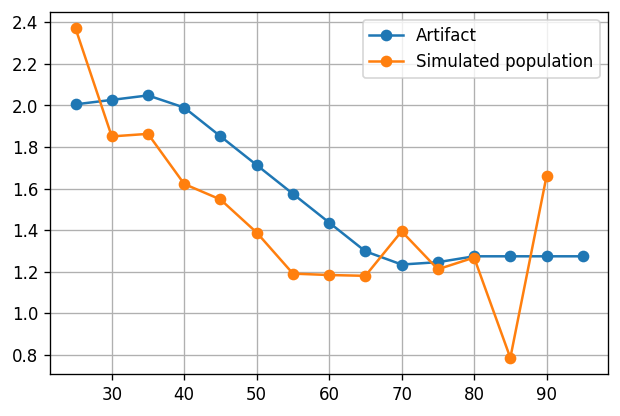

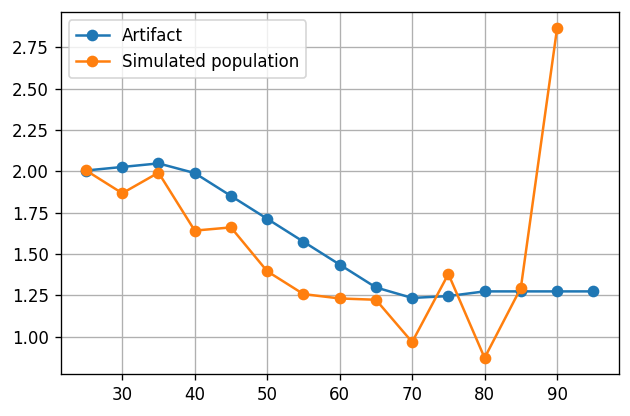

In [110]:
for sex in df.sex.unique():
    plt.figure(dpi=120)
    subdata = ldl_rr_mi.loc[ldl_rr_mi['sex']==sex]
    plt.plot(subdata.age_start, subdata['mean'], marker='o', label='Artifact')
    subdata2 = df.loc[df['sex']==sex]
    plt.plot(subdata2.age, subdata2.rr, marker='o', label='Simulated population')
    plt.legend()
    plt.grid()

### Now for Stroke with LDL-C

In [74]:
df = pd.DataFrame() 
for sex in data_MI_regression.sex.unique():
    for age in data_MI_regression.age_start.unique():
        current_data = data_MI_regression.loc[(data_MI_regression['age_start']==age) & (data_MI_regression['sex']==sex)]
        model = smf.logit("acute_stroke ~ high_ldl_cholesterol", data = current_data).fit()
        coeff = model.params
        results_df = pd.DataFrame({"age":age,
                               "sex":sex,
                               "coeff":coeff})
        df = df.append(results_df)

Optimization terminated successfully.
         Current function value: 0.000039
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000081
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000191
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000056
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000103
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.000120
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000409
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(re

Optimization terminated successfully.
         Current function value: 0.000983
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.001147
         Iterations 11


/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3529557807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)


In [75]:
df = df.loc[df.index=='high_ldl_cholesterol']
df['rr'] = np.exp(df.coeff)
df = df.sort_values(by=['age'])
df.head()

,age,sex,coeff,rr
high_ldl_cholesterol,25.0,Male,0.377981,1.459336
high_ldl_cholesterol,25.0,Female,0.339294,1.403956
high_ldl_cholesterol,30.0,Female,0.336469,1.399995
high_ldl_cholesterol,30.0,Male,0.363967,1.439027
high_ldl_cholesterol,35.0,Female,0.459688,1.583580


In [56]:
ldl_rr_stroke = ldl_rr.loc[ldl_rr['affected_entity']=='acute_ischemic_stroke']

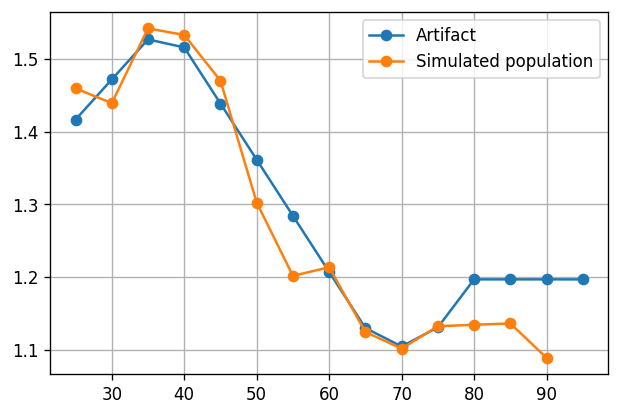

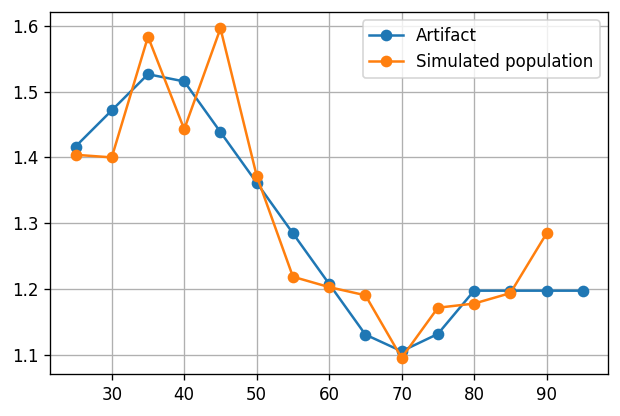

In [76]:
for sex in df.sex.unique():
    plt.figure(dpi=120)
    subdata = ldl_rr_stroke.loc[ldl_rr_stroke['sex']==sex]
    plt.plot(subdata.age_start, subdata['mean'], marker='o', label='Artifact')
    subdata2 = df.loc[df['sex']==sex]
    plt.plot(subdata2.age, subdata2.rr, marker='o', label='Simulated population')
    plt.legend()
    plt.grid()

### Now with MI and SBP

In [58]:
data_MI_regression = data_MI_regression.loc[data_MI_regression['age_start']<95]
df = pd.DataFrame() 
for sex in data_MI_regression.sex.unique():
    for age in data_MI_regression.age_start.unique():
        current_data = data_MI_regression.loc[(data_MI_regression['age_start']==age) & (data_MI_regression['sex']==sex)]
        model = smf.logit("acute_mi ~ sbp_exposure", data = current_data).fit()
        coeff = model.params
        results_df = pd.DataFrame({"age":age,
                               "sex":sex,
                               "coeff":coeff})
        df = df.append(results_df)

Optimization terminated successfully.
         Current function value: 0.000121
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000393
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.000822
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000226
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000534
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.000040
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000611
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.001390
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(re

Optimization terminated successfully.
         Current function value: 0.000573
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.001488
         Iterations 11


/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/3565464157.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)


In [59]:
df = df.loc[df.index=='sbp_exposure']
df['rr'] = np.exp(df.coeff)
df = df.sort_values(by=['age'])
df.head()

,age,sex,coeff,rr
sbp_exposure,25.0,Male,0.739268,2.094403
sbp_exposure,25.0,Female,0.645575,1.907084
sbp_exposure,30.0,Female,0.571796,1.771446
sbp_exposure,30.0,Male,0.575914,1.778756
sbp_exposure,35.0,Female,0.569178,1.766815


In [60]:
rel_risk = art.load('risk_factor.high_systolic_blood_pressure.relative_risk')
sbp_rr = (rel_risk
                .groupby(['affected_entity','age_start','sex'])
                .draw_0.describe()
                .filter(['mean'])
                .reset_index())
sbp_rr_mi = sbp_rr.loc[sbp_rr['affected_entity']=='acute_myocardial_infarction']
sbp_rr_mi.head()

,affected_entity,age_start,sex,mean
30,acute_myocardial_infarction,25.0,Female,2.0317
31,acute_myocardial_infarction,25.0,Male,2.0317
32,acute_myocardial_infarction,30.0,Female,1.8558
33,acute_myocardial_infarction,30.0,Male,1.8558
34,acute_myocardial_infarction,35.0,Female,1.6799


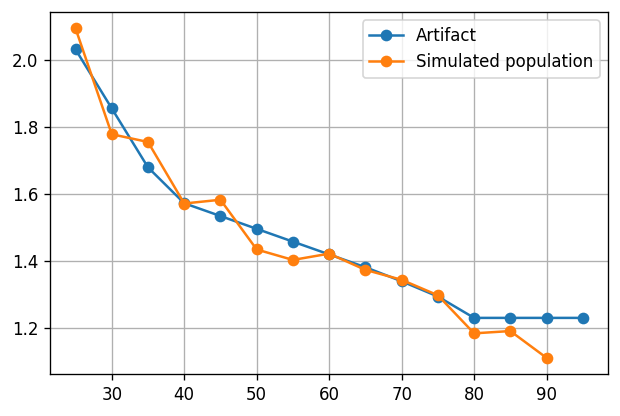

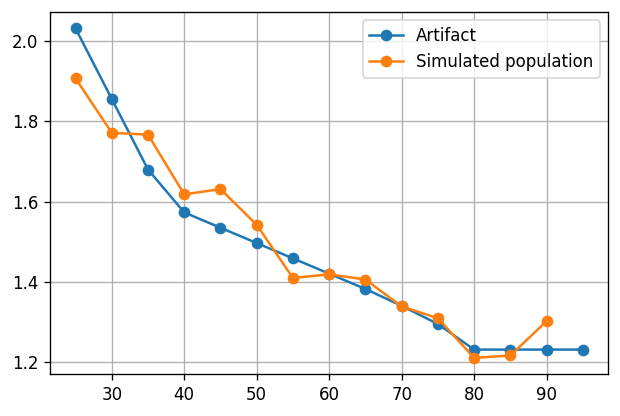

In [61]:
for sex in df.sex.unique():
    plt.figure(dpi=120)
    subdata = sbp_rr_mi.loc[sbp_rr_mi['sex']==sex]
    plt.plot(subdata.age_start, subdata['mean'], marker='o', label='Artifact')
    subdata2 = df.loc[df['sex']==sex]
    plt.plot(subdata2.age, subdata2.rr, marker='o', label='Simulated population')
    plt.legend()
    plt.grid()

### Stroke for SBP

In [62]:
data_MI_regression = data_MI_regression.loc[data_MI_regression['age_start']<95]
df = pd.DataFrame() 
for sex in data_MI_regression.sex.unique():
    for age in data_MI_regression.age_start.unique():
        current_data = data_MI_regression.loc[(data_MI_regression['age_start']==age) & (data_MI_regression['sex']==sex)]
        model = smf.logit("acute_stroke ~ sbp_exposure", data = current_data).fit()
        coeff = model.params
        results_df = pd.DataFrame({"age":age,
                               "sex":sex,
                               "coeff":coeff})
        df = df.append(results_df)

Optimization terminated successfully.
         Current function value: 0.000039
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000081
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000191
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000056
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000103
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.000120
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.000409
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(re

Optimization terminated successfully.
         Current function value: 0.000984
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.001147
         Iterations 11


/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_385610/2203869139.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)


In [63]:
df = df.loc[df.index=='sbp_exposure']
df['rr'] = np.exp(df.coeff)
df = df.sort_values(by=['age'])
df.head()

,age,sex,coeff,rr
sbp_exposure,25.0,Male,0.580622,1.787150
sbp_exposure,25.0,Female,0.543635,1.722256
sbp_exposure,30.0,Female,0.507855,1.661722
sbp_exposure,30.0,Male,0.512996,1.670288
sbp_exposure,35.0,Female,0.523701,1.688265


In [64]:
sbp_rr_stroke = sbp_rr.loc[sbp_rr['affected_entity']=='acute_myocardial_infarction']
sbp_rr_stroke.head()

,affected_entity,age_start,sex,mean
30,acute_myocardial_infarction,25.0,Female,2.0317
31,acute_myocardial_infarction,25.0,Male,2.0317
32,acute_myocardial_infarction,30.0,Female,1.8558
33,acute_myocardial_infarction,30.0,Male,1.8558
34,acute_myocardial_infarction,35.0,Female,1.6799


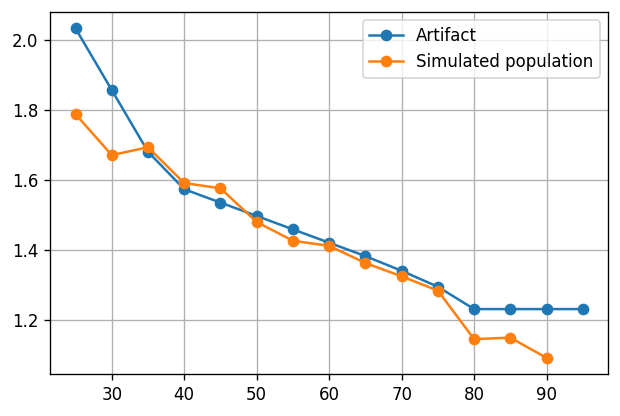

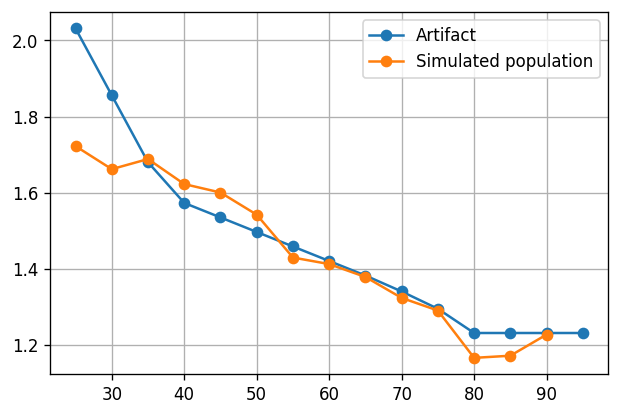

In [65]:
for sex in df.sex.unique():
    plt.figure(dpi=120)
    subdata = sbp_rr_stroke.loc[sbp_rr_stroke['sex']==sex]
    plt.plot(subdata.age_start, subdata['mean'], marker='o', label='Artifact')
    subdata2 = df.loc[df['sex']==sex]
    plt.plot(subdata2.age, subdata2.rr, marker='o', label='Simulated population')
    plt.legend()
    plt.grid()

### Angina with SBP

In [140]:
data_MI_regression = data_MI_regression.loc[(data_MI_regression['age_start']<95) & (data_MI_regression['age_start']>20)]
df = pd.DataFrame() 
for sex in data_MI_regression.sex.unique():
    for age in data_MI_regression.age_start.unique():
        current_data = data_MI_regression.loc[(data_MI_regression['age_start']==age) & (data_MI_regression['sex']==sex)]
        model = smf.logit("angina_inc ~ sbp_exposure", data = current_data).fit()
        coeff = model.params
        results_df = pd.DataFrame({"age":age,
                               "sex":sex,
                               "coeff":coeff})
        df = df.append(results_df)

Optimization terminated successfully.
         Current function value: 0.000028
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000057
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000086
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000035
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000067
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000018
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000066
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000076
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.

/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

Optimization terminated successfully.
         Current function value: 0.000083
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000035
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000094
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.000039
         Iterations 15


/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2129065959.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

In [141]:
df = df.loc[df.index=='sbp_exposure']
df['rr'] = np.exp(df.coeff)
df = df.sort_values(by=['age'])
df.head()

,age,sex,coeff,rr
sbp_exposure,25.0,Male,0.582754,1.790964
sbp_exposure,25.0,Female,0.100521,1.105747
sbp_exposure,30.0,Female,0.420908,1.523345
sbp_exposure,30.0,Male,0.397426,1.487990
sbp_exposure,35.0,Female,0.464208,1.590754


In [144]:
rel_risk = art.load('risk_factor.high_systolic_blood_pressure.relative_risk')
sbp_rr = (rel_risk
                .groupby(['affected_entity','age_start','sex'])
                .draw_0.describe()
                .filter(['mean'])
                .reset_index())
sbp_rr_angina = sbp_rr.loc[sbp_rr['affected_entity']=='angina']
sbp_rr_angina.head()

,affected_entity,age_start,sex,mean
60,angina,25.0,Female,2.0317
61,angina,25.0,Male,2.0317
62,angina,30.0,Female,1.8558
63,angina,30.0,Male,1.8558
64,angina,35.0,Female,1.6799


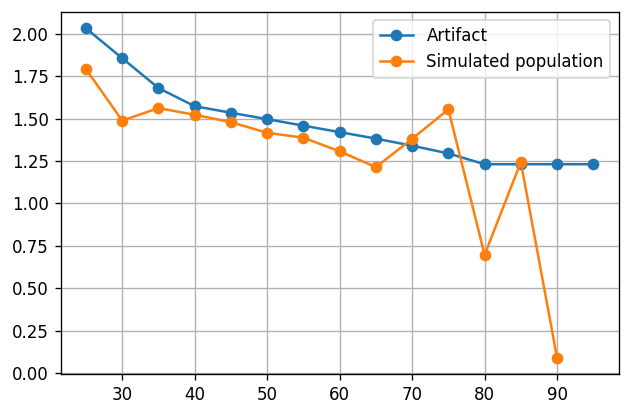

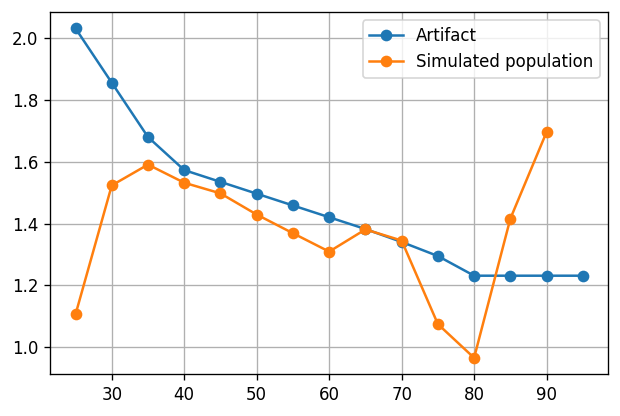

In [145]:
for sex in df.sex.unique():
    plt.figure(dpi=120)
    subdata = sbp_rr_angina.loc[sbp_rr_angina['sex']==sex]
    plt.plot(subdata.age_start, subdata['mean'], marker='o', label='Artifact')
    subdata2 = df.loc[df['sex']==sex]
    plt.plot(subdata2.age, subdata2.rr, marker='o', label='Simulated population')
    plt.legend()
    plt.grid()

### Angina with LDL-C

In [147]:
data_MI_regression = data_MI_regression.loc[(data_MI_regression['age_start']<95) & (data_MI_regression['age_start']>20)]
df = pd.DataFrame() 
for sex in data_MI_regression.sex.unique():
    for age in data_MI_regression.age_start.unique():
        current_data = data_MI_regression.loc[(data_MI_regression['age_start']==age) & (data_MI_regression['sex']==sex)]
        model = smf.logit("angina_inc ~ high_ldl_cholesterol", data = current_data).fit()
        coeff = model.params
        results_df = pd.DataFrame({"age":age,
                               "sex":sex,
                               "coeff":coeff})
        df = df.append(results_df)

Optimization terminated successfully.
         Current function value: 0.000028
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000057
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000086
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000035
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000067
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000031
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.000018
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.000066
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000076
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.

/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

Optimization terminated successfully.
         Current function value: 0.000035
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000081
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.000039
         Iterations 15


/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)
/tmp/ipykernel_1938380/2518344593.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df)


In [148]:
df = df.loc[df.index=='high_ldl_cholesterol']
df['rr'] = np.exp(df.coeff)
df = df.sort_values(by=['age'])
df.head()

,age,sex,coeff,rr
high_ldl_cholesterol,25.0,Male,0.862142,2.368228
high_ldl_cholesterol,25.0,Female,0.691860,1.997428
high_ldl_cholesterol,30.0,Female,0.624880,1.868022
high_ldl_cholesterol,30.0,Male,0.616632,1.852677
high_ldl_cholesterol,35.0,Female,0.676429,1.966841


In [149]:
rel_risk = art.load('risk_factor.high_ldl_cholesterol.relative_risk')
ldl_rr = (rel_risk
                .groupby(['affected_entity','age_start','sex'])
                .draw_0.describe()
                .filter(['mean'])
                .reset_index())
ldl_rr_angina = ldl_rr.loc[ldl_rr['affected_entity']=='angina']
ldl_rr_angina.head()

,affected_entity,age_start,sex,mean
60,angina,25.0,Female,2.0053
61,angina,25.0,Male,2.0053
62,angina,30.0,Female,2.0267
63,angina,30.0,Male,2.0267
64,angina,35.0,Female,2.0483


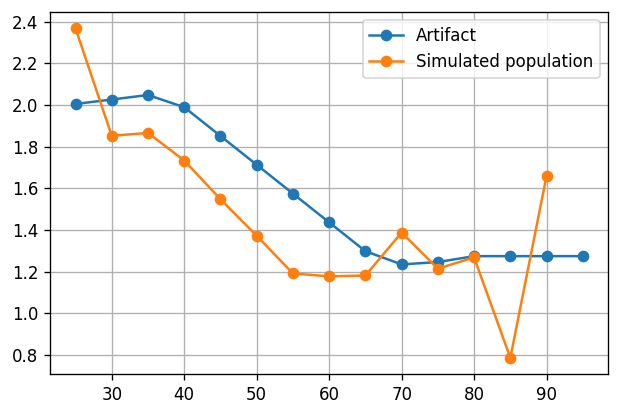

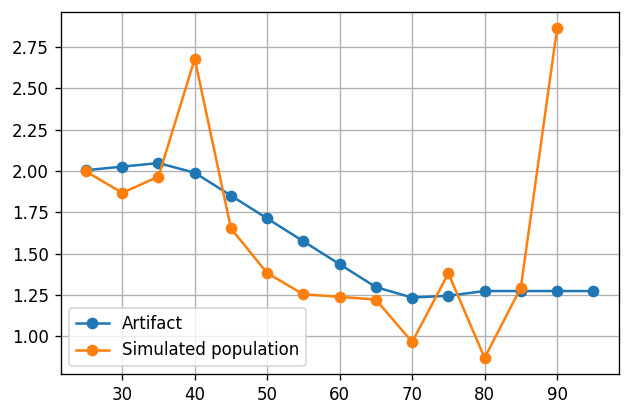

In [150]:
for sex in df.sex.unique():
    plt.figure(dpi=120)
    subdata = ldl_rr_angina.loc[ldl_rr_angina['sex']==sex]
    plt.plot(subdata.age_start, subdata['mean'], marker='o', label='Artifact')
    subdata2 = df.loc[df['sex']==sex]
    plt.plot(subdata2.age, subdata2.rr, marker='o', label='Simulated population')
    plt.legend()
    plt.grid()

## Testing for Overlap of Angina and MI

In [38]:
sim_data = pd.DataFrame()
for step in list(range(0,100)):
    sim.step()
    pop_t = sim.get_population()
    data_t = pd.concat([pop_t], axis=1)
    data_t['step'] = step
    sim_data = pd.concat([sim_data, data_t])

2022-09-06 10:41:22.162 | DEBUG    | vivarium.framework.engine:step:172 - 2027-10-06 00:00:00
2022-09-06 10:41:35.893 | DEBUG    | vivarium.framework.engine:step:172 - 2027-11-03 00:00:00
2022-09-06 10:41:49.743 | DEBUG    | vivarium.framework.engine:step:172 - 2027-12-01 00:00:00
2022-09-06 10:42:03.306 | DEBUG    | vivarium.framework.engine:step:172 - 2027-12-29 00:00:00
2022-09-06 10:42:17.042 | DEBUG    | vivarium.framework.engine:step:172 - 2028-01-26 00:00:00
2022-09-06 10:42:30.704 | DEBUG    | vivarium.framework.engine:step:172 - 2028-02-23 00:00:00
2022-09-06 10:42:44.303 | DEBUG    | vivarium.framework.engine:step:172 - 2028-03-22 00:00:00
2022-09-06 10:42:57.831 | DEBUG    | vivarium.framework.engine:step:172 - 2028-04-19 00:00:00
2022-09-06 10:43:11.718 | DEBUG    | vivarium.framework.engine:step:172 - 2028-05-17 00:00:00
2022-09-06 10:43:25.280 | DEBUG    | vivarium.framework.engine:step:172 - 2028-06-14 00:00:00
2022-09-06 10:43:39.554 | DEBUG    | vivarium.framework.engi

In [46]:
sim_data_time99 = sim_data.loc[sim_data['step'] == 99]

In [47]:
len(sim_data_time99.loc[(sim_data_time99.angina =='angina') & (sim_data_time99.acute_myocardial_infarction_event_count > 0)])

8

In [48]:
len(sim_data_time99.loc[(sim_data_time99.angina =='angina') | (sim_data_time99.acute_myocardial_infarction_event_count > 0)])

368

In [49]:
len(sim_data_time99.loc[(sim_data_time99.angina =='angina')])

88

In [50]:
len(sim_data_time99.loc[(sim_data_time99.acute_myocardial_infarction_event_count > 0)])

288

In [51]:
8/(288+88)

0.02127659574468085